# Adidas Sales Analysis


# Setup & Quick peek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")

df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.columns.tolist()

['Retailer',
 'Retailer ID',
 'Invoice Date',
 'Region',
 'State',
 'City',
 'Product',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin',
 'Sales Method']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


# Data Cleaning and Preprocessing

In [6]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.memory_usage(deep=True).sum() / 1024**2  

4.212061882019043

In [9]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')
print(df['Invoice Date'].isnull().sum()) 


0


In [10]:
cat_cols = ['Retailer','Region','State','City','Product','Sales Method']
for c in cat_cols:
    df[c] = df[c].astype('category')


In [11]:
df['Year']       = df['Invoice Date'].dt.year
df['Month']      = df['Invoice Date'].dt.month
df['Month_Year'] = df['Invoice Date'].dt.to_period('M').astype(str)
df['DayOfWeek']  = df['Invoice Date'].dt.day_name()

In [12]:
df['Revenue_per_unit_calc'] = df['Total Sales'] / df['Units Sold'] 
df['Revenue_per_unit_calc'].describe()

count    9644.000000
mean      221.876815
std       238.081319
min         7.000000
25%        39.000000
50%        56.000000
75%       450.000000
max      1100.000000
Name: Revenue_per_unit_calc, dtype: float64

In [13]:
df['Total_check'] = df['Price per Unit'] * df['Units Sold']

mismatch = df[~np.isclose(df['Total Sales'], df['Total_check'], rtol=1e-6, atol=1e-8)]
len(mismatch), mismatch.head()

(3886,
       Retailer  Retailer ID Invoice Date     Region     State      City  \
 0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
 1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
 2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
 3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
 4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   
 
                      Product  Price per Unit  Units Sold  Total Sales  \
 0      Men's Street Footwear            50.0        1200     600000.0   
 1    Men's Athletic Footwear            50.0        1000     500000.0   
 2    Women's Street Footwear            40.0        1000     400000.0   
 3  Women's Athletic Footwear            45.0         850     382500.0   
 4              Men's Apparel            60.0         900     540000.0   
 
    Operating Profit  Operating Margin Sales Method  Year  Month Month_Year  \
 0        

In [14]:
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

monthly_sales = df.set_index('Invoice Date').resample('M')['Total Sales'].sum()

pivot_region_method = pd.pivot_table(df, values='Total Sales', index='Region', columns='Sales Method', aggfunc='sum', fill_value=0)

 # Key summary KPIs

In [15]:
total_sales        = df['Total Sales'].sum()
total_units_sold = df['Units Sold'].sum()
total_retailers    = df['Retailer'].nunique()
total_invoices     = df.shape[0]
sales_date_range   = (df['Invoice Date'].min(), df['Invoice Date'].max())

print("Total sales:", total_sales)
print(f"Total Units Sold: {total_units_sold}")
print("Unique retailers:", total_retailers)
print("Rows (invoices):", total_invoices)
print("Date range:", sales_date_range)


Total sales: 899902125.0
Total Units Sold: 2478861
Unique retailers: 6
Rows (invoices): 9648
Date range: (Timestamp('2020-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))


# Data Visualizations

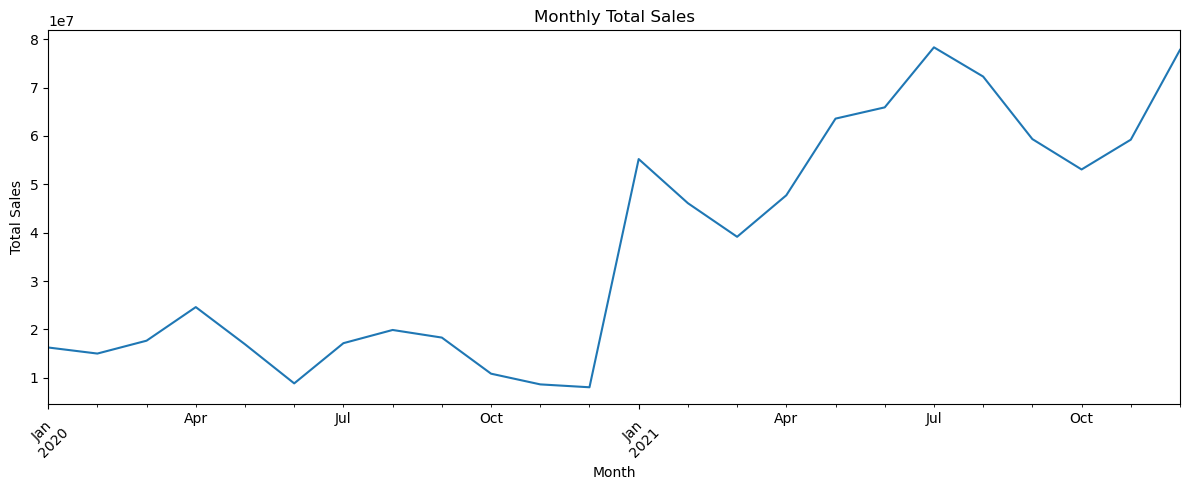

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
monthly_sales.plot(ax=ax)
ax.set_title('Monthly Total Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

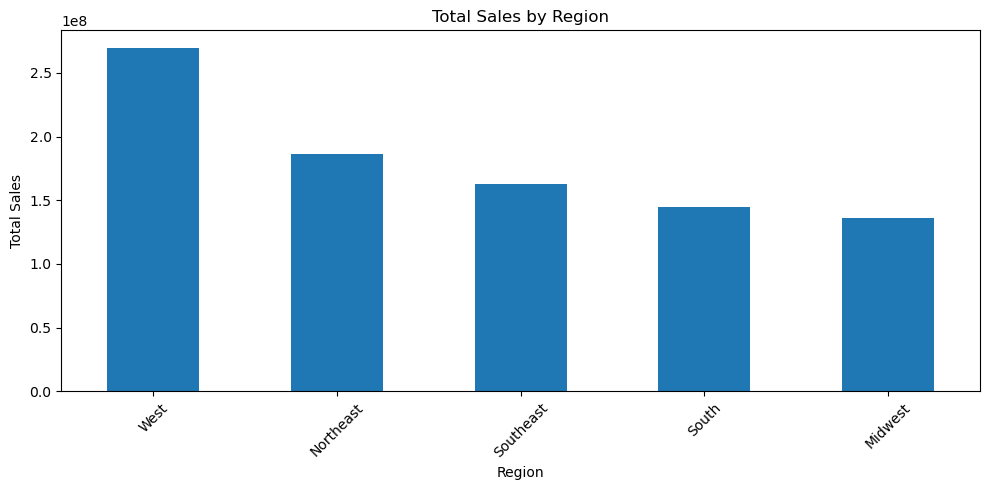

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sales_by_region.plot(kind='bar', ax=ax)
ax.set_title('Total Sales by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

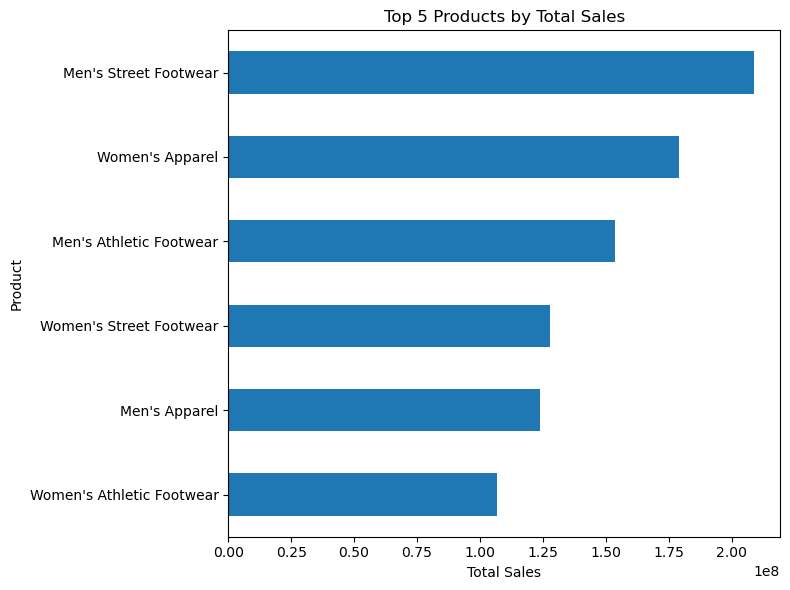

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
top_products.sort_values().plot(kind='barh', ax=ax)  
ax.set_title('Top 5 Products by Total Sales')
ax.set_xlabel('Total Sales')
plt.tight_layout()
plt.show()

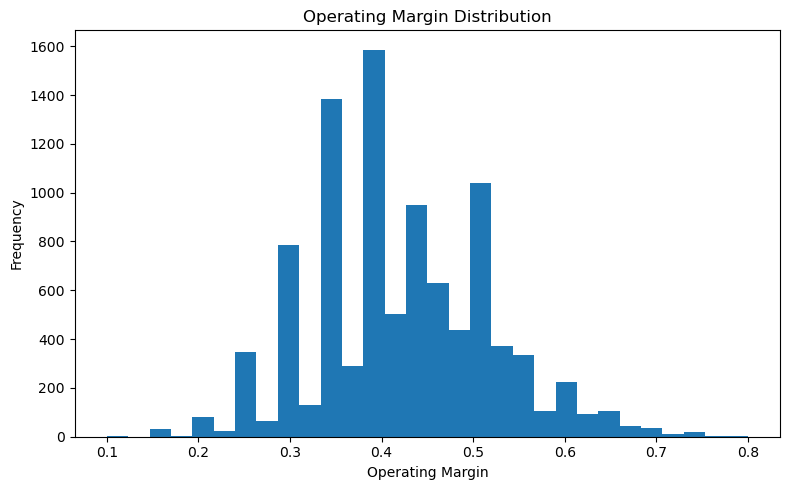

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
df['Operating Margin'].plot.hist(bins=30)
ax.set_title('Operating Margin Distribution')
ax.set_xlabel('Operating Margin')
plt.tight_layout()
plt.show()

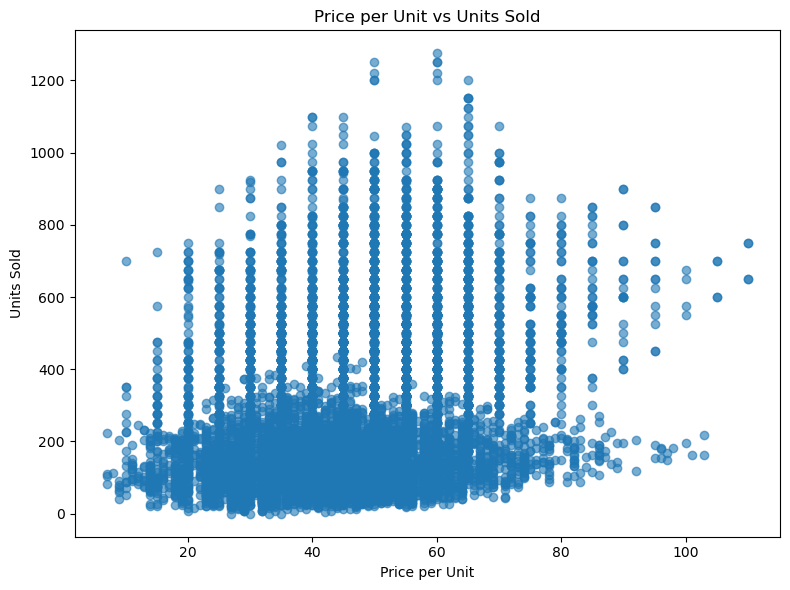

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['Price per Unit'], df['Units Sold'], alpha=0.6)
ax.set_xlabel('Price per Unit')
ax.set_ylabel('Units Sold')
ax.set_title('Price per Unit vs Units Sold')
plt.tight_layout()
plt.show()

# Statistical analysis

In [21]:
# Descriptive statistics + distribution check

         Total Sales  Operating Profit
count    9648.000000       9648.000000
mean    93273.437500      34425.244761
std    141916.016727      54193.113713
min         0.000000          0.000000
25%      4254.500000       1921.752500
50%      9576.000000       4371.420000
75%    150000.000000      52062.500000
max    825000.000000     390000.000000
Skewness (Total Sales): 1.8413591666120177
Kurtosis (Total Sales): 3.1438419253367886
Skewness (Operating Profit): 2.2335982483835206
Kurtosis (Operating Profit): 5.820367242809598


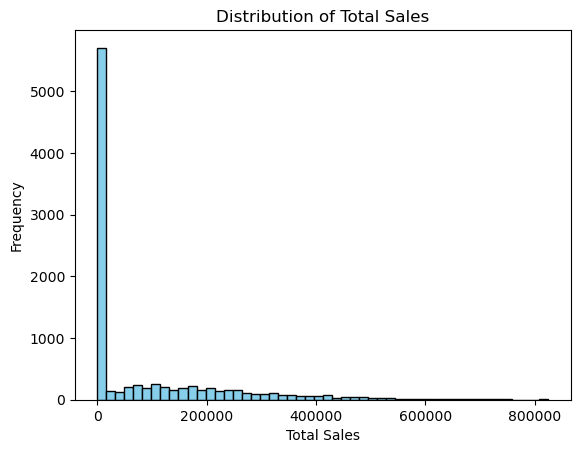

In [22]:
print(df[['Total Sales', 'Operating Profit']].describe())

print("Skewness (Total Sales):", df['Total Sales'].skew())
print("Kurtosis (Total Sales):", df['Total Sales'].kurtosis())

print("Skewness (Operating Profit):", df['Operating Profit'].skew())
print("Kurtosis (Operating Profit):", df['Operating Profit'].kurtosis())

plt.hist(df['Total Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


In [23]:
#Correlation matrix + heatmap

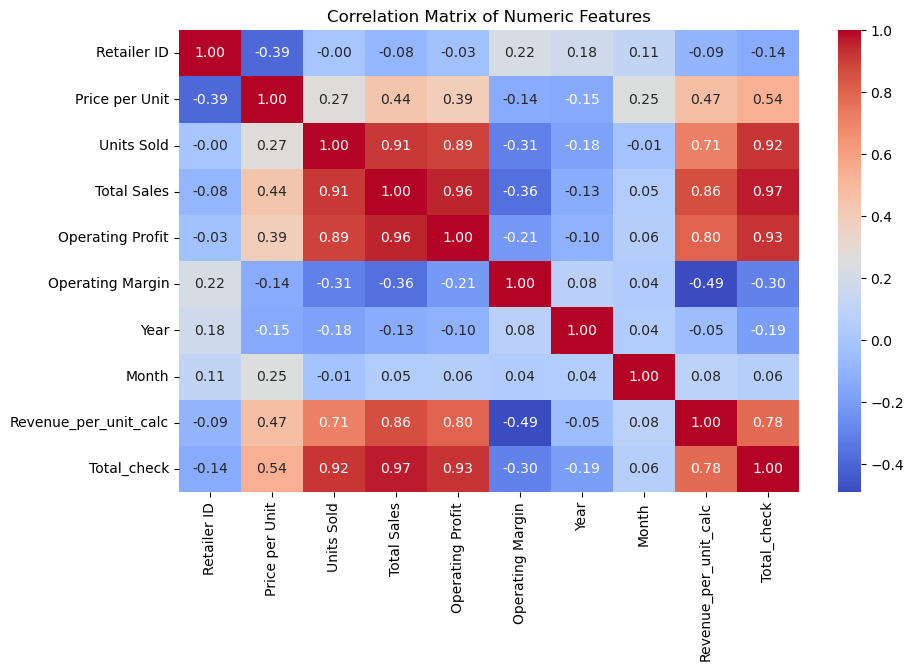

In [24]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [25]:
#Linear Regression: Predict Total Sales from Units Sold

In [26]:
import statsmodels.api as sm

X = df['Units Sold']
y = df['Total Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 4.859e+04
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:43:06   Log-Likelihood:            -1.1947e+05
No. Observations:                9648   AIC:                         2.389e+05
Df Residuals:                    9646   BIC:                         2.390e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.218e+04    918.244    -67.715      0.0

In [29]:
#Time Series Analysis

Time series sample:
Invoice Date
2020-01-31    16253746.0
2020-02-29    14997988.0
2020-03-31    17660577.0
2020-04-30    24607006.0
2020-05-31    16918014.0
Freq: M, Name: Total Sales, dtype: float64


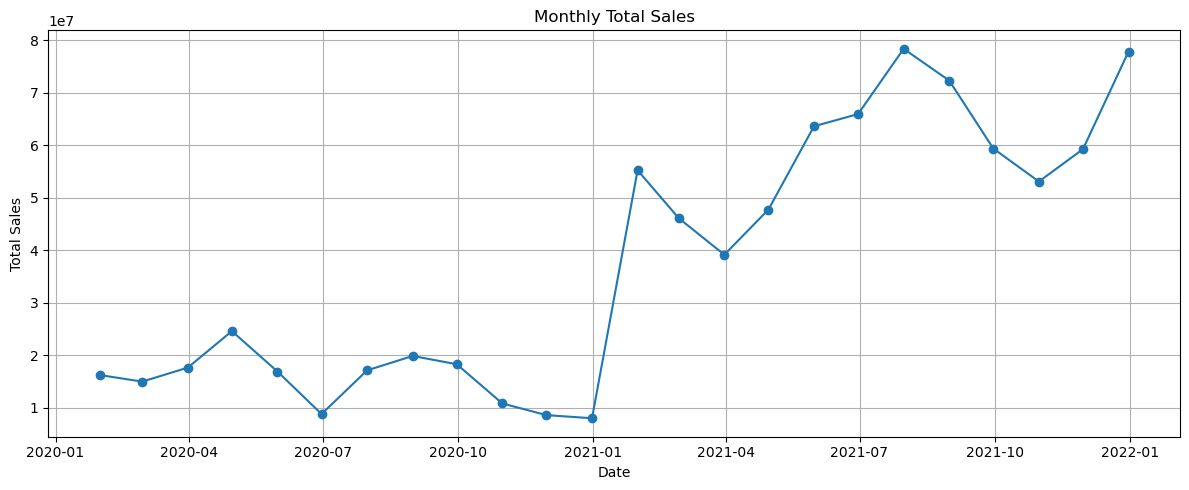

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df.set_index('Invoice Date')['Total Sales'].resample('M').sum()
print("Time series sample:")
print(ts.head())

plt.figure(figsize=(12,5))
plt.plot(ts.index, ts, marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



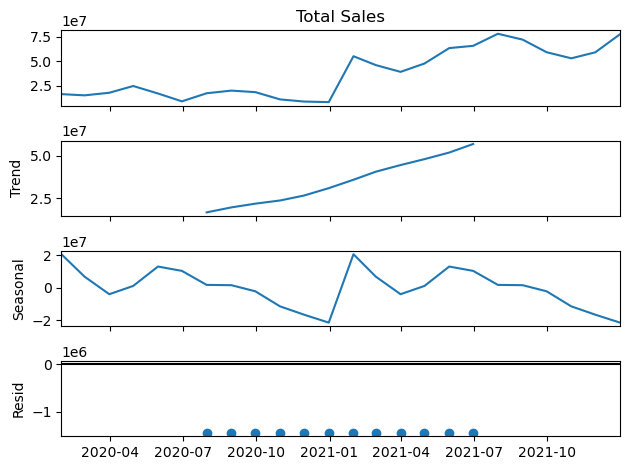

In [28]:
if len(ts) >= 24:
    result = seasonal_decompose(ts, model='additive', period=12)
    result.plot()
    plt.show()
else:
    print("Not enough data for seasonal decomposition (need at least 24 months).")
